In [93]:
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import json
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from collections import Counter
import operator
from random import randint
import pickle
import sys
import re
import os
from sklearn.feature_selection import chi2
import random
from ckiptagger import WS

# word segmentation model
ws = WS("./data")

def readPickle():
	with open('dataset.pickle', 'rb') as data:
		data = pickle.load(data)
	return(data)

def removeNode(data):
	r1 = '[0-9’!１２３４５６７８９０"#$%&\'()（）*+,-/:;<=>?@，。?★、…【】《》＊;「」？“”‘’！：[\\]^_`{|}~‧，？.～ ；]+'
	for i in range(len(data)):
	#for i in range(1):
		for j in range(len(data[i][1])):
			data[i][1][j] = re.sub(r1,'',data[i][1][j])

	for i in range(len(data)):
		needRemove = 0
		for j in range(len(data[i][1])):
			if data[i][1][j-needRemove] == '':
				#print(j,j-needRemove,)
				data[i][1].remove(data[i][1][j-needRemove])
				needRemove += 1
	return(data)

def loadStopwords():
	stopwords = []
	with open('CN_stopwords.txt', 'r', encoding='UTF-8') as f1:
		for line in f1:
			stopwords += (line.split())
	return(stopwords)

def splitTrainTest(data):
	len_all = len(data)
	boundary = int(len_all*7/8)
# 	print(boundary)
	random.shuffle(data)
	train_data = data[0:boundary]
	test_data = data[boundary:]
	train_size = boundary
	test_size = len_all - boundary


	return(train_data, test_data, train_size, test_size)

def makeDataList(train_data, test_data):
	train_x = []
	train_y = []
	test_x = []
	test_y = []
	train_str = []
	test_str = []
	for i in range(len(train_data)):
		train_x.append(train_data[i][1])
		train_y.append(train_data[i][0])
	for i in range(len(test_data)):
		test_x.append(test_data[i][1])
		test_y.append(test_data[i][0])

	for i in range(len(train_x)):
		str1 = ' '.join(train_x[i])
		str1 = re.sub('\n','',str1)
		train_str.append(str1)

	for i in range(len(test_x)):
		str1 = ' '.join(test_x[i])
		str1 = re.sub('\n','',str1)
		test_str.append(str1)
	return(train_str, test_str, train_y, test_y)

def dataRepresent(CN_stopwords, train_str, test_str):
	tfidfconverter = TfidfVectorizer(max_features = feature_num, min_df=5, max_df=0.6, stop_words=CN_stopwords) 
# 	print("======== method : tfidfconverter =========")
	train_x = tfidfconverter.fit_transform(train_str).toarray()
	features = tfidfconverter.get_feature_names()
# 	print("======== features : tfidfconverter =========")
# 	print(tfidfconverter.get_feature_names())
	temp = TfidfVectorizer(vocabulary=features)
	test_x = temp.fit_transform(test_str).toarray()

	return train_x, test_x, temp

# =========================== main function ===========================
# =========== didn't revise because of laziness =======================
feature_num = 420
data = readPickle()
data = removeNode(data)
CN_stopwords = loadStopwords()
train_data, test_data, train_size, test_size = splitTrainTest(data)
train_str, test_str, train_y, test_y = makeDataList(train_data, test_data)
train_x, test_x, tfidf_converter = dataRepresent(CN_stopwords, train_str, test_str)

# ========================== load model ==============================
with open('model.pickle', 'rb') as model:
    classifier = pickle.load( model )
    model.close()
    
# ========================== predict =================================
post_filename = sys.argv[1]
predict_posts = pd.read_excel(post_filename, index_col = 0)

try:
    lst = list( predict_posts['Content'].iloc[1:] )
except KeyError:
    lst = list( predict_posts['CommentContent'].iloc[1:] )

lst = [' '.join(i) for i in ws(lst)] 
# pred_posts = []
    
# for i in lst:
predict_posts_x = tfidf_converter.fit_transform( lst ).toarray()
pred_posts = classifier.predict( predict_posts_x ) 

han_score = 1 - sum( pred_posts ) / len( pred_posts )
non_han_score = sum( pred_posts ) / len( pred_posts )


print('====== Prediction ========')
print( 'Filename:', post_filename )
print( "Han's Arrow Score:", han_score )
print( 'Non-Han Score:', non_han_score )

====== Prediction ========
Filename: KMTPostsComments.xlsx
Han's Arrow Score: 1.0
Non-Han Score: 0.0


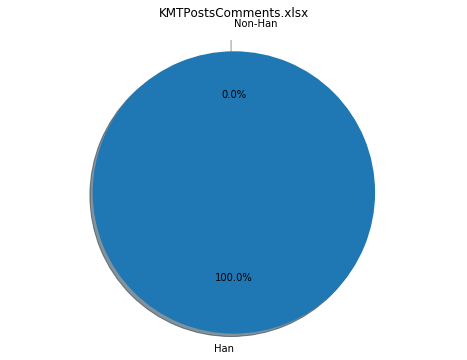

In [94]:
# ========================== plotting ==================================

labels = 'Han', 'Non-Han'
sizes = [ han_score, non_han_score ]
explode = (0.1, 0 )  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_facecolor('xkcd:salmon')
ax1.set_facecolor((1.0, 0.47, 0.42))
plt.title( post_filename )

plt.savefig(post_filename + '.png')

In [51]:
# X_0 = []

# for i in range(len(train_y)):
#     if train_y[i] == 0:
#         X_0.append(train_x[i])
        
# X_1 = []

# for i in range(len(train_y)):
#     if train_y[i] == 1:
#         X_1.append(train_x[i])

In [55]:
# 1 - sum( classifier.predict(X_0) ) / len(X_0)

0.615979381443299

In [54]:
# sum( classfier.predict(X_1) ) / len(X_1)

0.8082191780821918